Data: [Kaggle](https://github.com/Doug-Vo/ML-Self-Project/pull/new/MSP-1_Set_up_doc)




In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import set_config
set_config(transform_output="pandas")

df = pd.read_csv('Data/sleep_health.csv')

df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [2]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


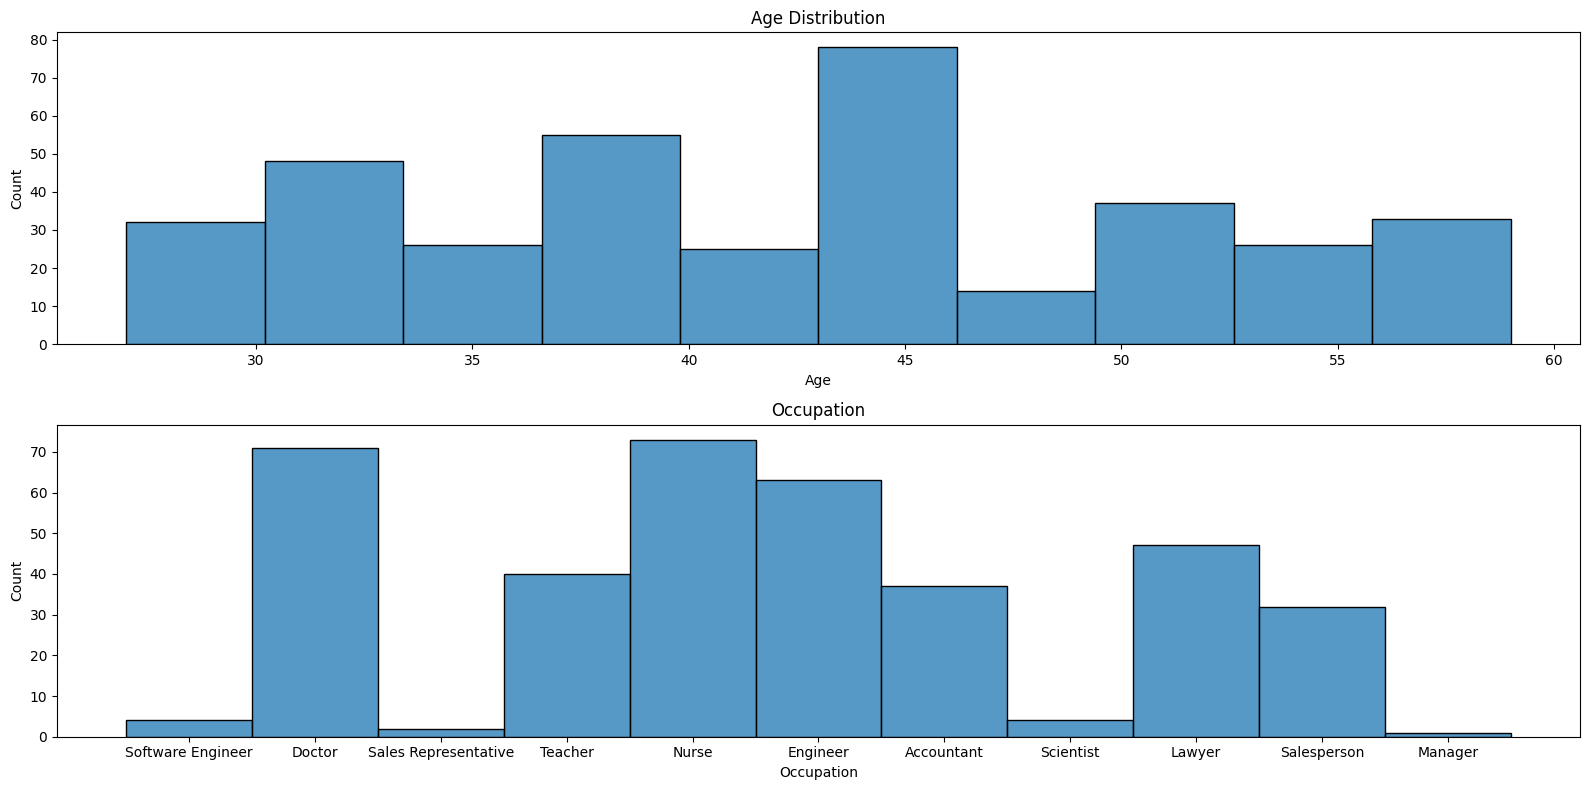

In [4]:
plt.figure(figsize = (16,8))


plt.subplot(2, 1, 1)


sns.histplot(df['Age'])
plt.title('Age Distribution')

plt.subplot(2,1,2)

sns.histplot(df['Occupation'])

plt.title("Occupation")

plt.tight_layout()
plt.show()



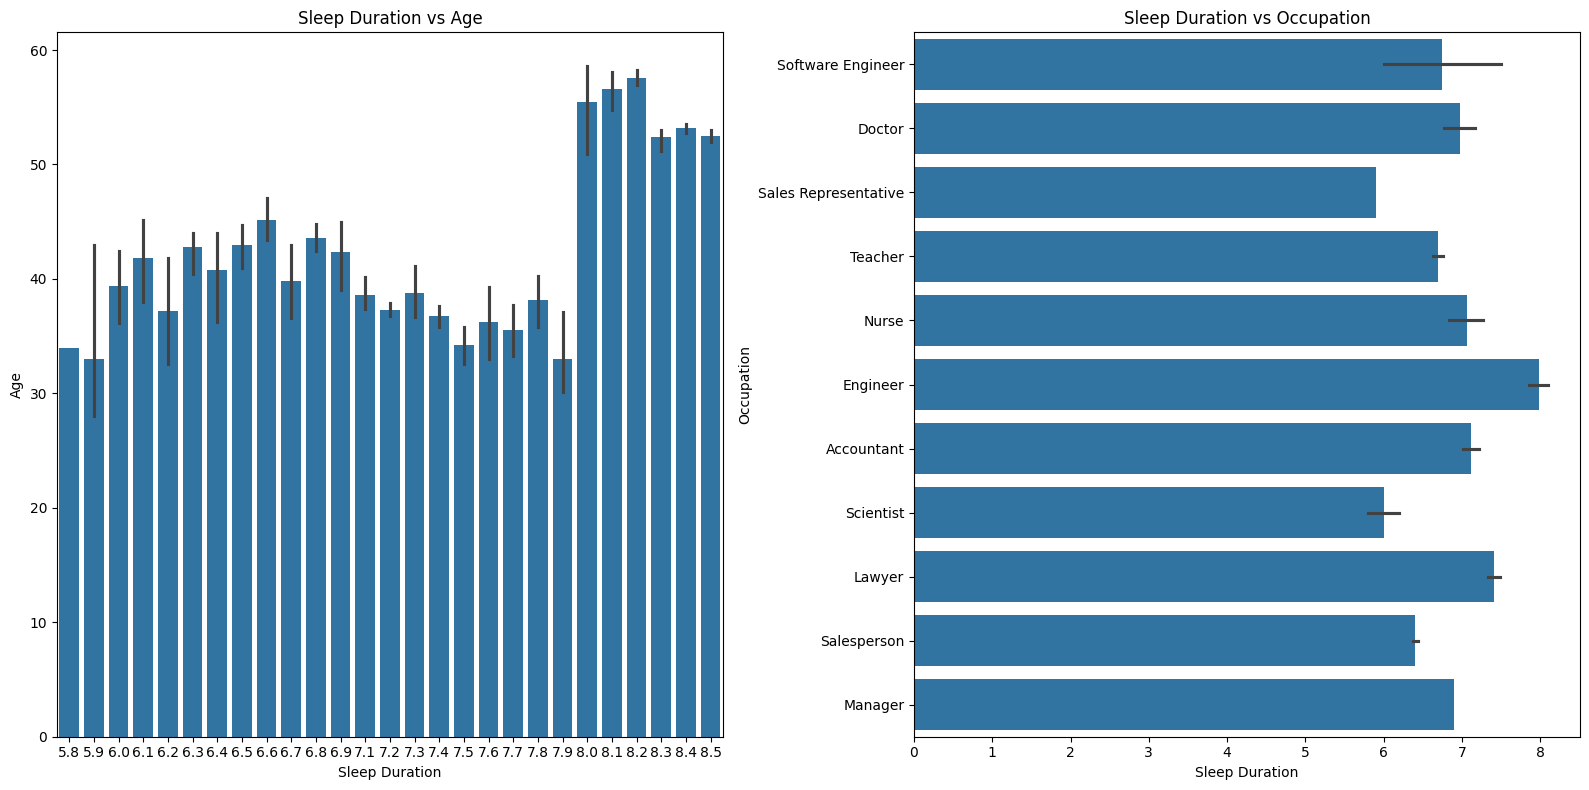

In [5]:


plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
sns.barplot(df, x = 'Sleep Duration', y = 'Age')
plt.title("Sleep Duration vs Age")



plt.subplot(1, 2, 2)
sns.barplot(df, x = 'Sleep Duration', y = 'Occupation')
plt.title("Sleep Duration vs Occupation")
plt.tight_layout()
plt.show()



## **Preprocessing**

Let's look at missing values, min and max


In [6]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
print(df.describe().loc[['min', 'max']])

     Person ID   Age  Sleep Duration  Quality of Sleep  \
min        1.0  27.0             5.8               4.0   
max      374.0  59.0             8.5               9.0   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
min                     30.0           3.0        65.0       3000.0  
max                     90.0           8.0        86.0      10000.0  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Insight**

We have no missing values or outliers
So let's label encode most of object feature. Let's have a look at those columns to know what we are dealing with

In [9]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [10]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [11]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [12]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

It looks like `gender` and `Blood Pressure` will need special care

- `gender` will convert to boolean value (turn to `int`)
- `Blood Pressure` will be split into `Systolic` and `Diastolic`, based from my research `Systolic` matters more for *Sleep Quality* so we will use that for our correlation

The rest can be encode with `pd.get_dummies` And notice in `BMI Category` there are `Normal` and `Normal Weight` and I assume that they are the same thing so we will merge them into one

In [13]:
bmi_mapping = {
    'Normal' : 0,
    'Normal Weight': 0,
    'Overweight': 1,
    'Obese': 2
}

df['BMI Category'] = df['BMI Category'].map(bmi_mapping)


In [14]:
df = pd.get_dummies(df, columns = ['Sleep Disorder', 'Occupation'], dtype = int)

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand = True).astype(int)
df['is_Male'] = (df['Gender'] == "Male").astype(int)



df = df.drop(columns = ['Blood Pressure', 'Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   BMI Category                     374 non-null    int64  
 7   Heart Rate                       374 non-null    int64  
 8   Daily Steps                      374 non-null    int64  
 9   Sleep Disorder_Insomnia          374 non-null    int32  
 10  Sleep Disorder_Sleep Apnea       374 non-null    int32  
 11  Occupation_Accountant            374 non-null    int32  
 12  Occupation_Doctor     

Since our target (`Sleep Duration`) has a wide range, that would be quite difficult to predict every class, so we will split them into 3 class [`low`,`mid`,`high`] as [1 ,2 ,3]



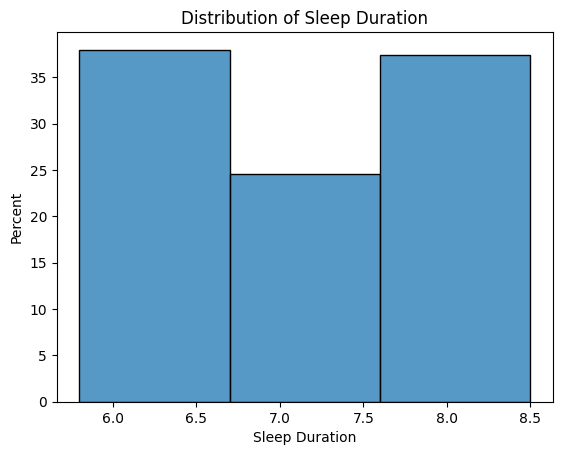

In [15]:


# Histogram
sns.histplot(df, x = "Sleep Duration", bins=3, stat = 'percent')
plt.title('Distribution of Sleep Duration')

plt.show()


In [16]:
df['Sleep Target'] = pd.qcut(df['Sleep Duration'], q= 3, labels= [1, 2, 3]).astype(int)

# Group by the new target and look at the Sleep Duration stats
ranges = df.groupby('Sleep Target')['Sleep Duration'].agg(['min', 'max', 'count'])
print(ranges)

              min  max  count
Sleep Target                 
1             5.8  6.6    142
2             6.7  7.7    126
3             7.8  8.5    106


In [17]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic', 'Diastolic', 'is_Male',
       'Sleep Target'],
      dtype='object')

Let's set up some **correlation matrix**, the encoded one will have their own separated table underneath

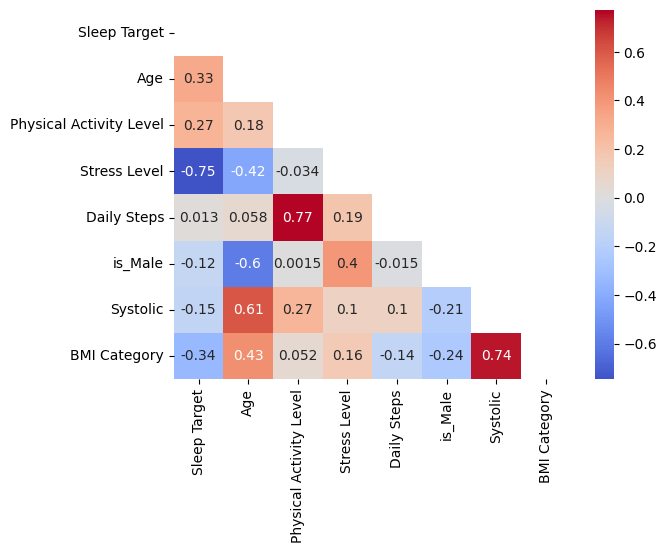

In [18]:
import numpy as np
corr_df = df[['Sleep Target', 'Age',  'Physical Activity Level', 'Stress Level', 'Daily Steps',
              'is_Male', 'Systolic','BMI Category']].copy()

matrix = corr_df.corr()

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask = mask, cmap = 'coolwarm', annot = True, center = 0)

plt.show()

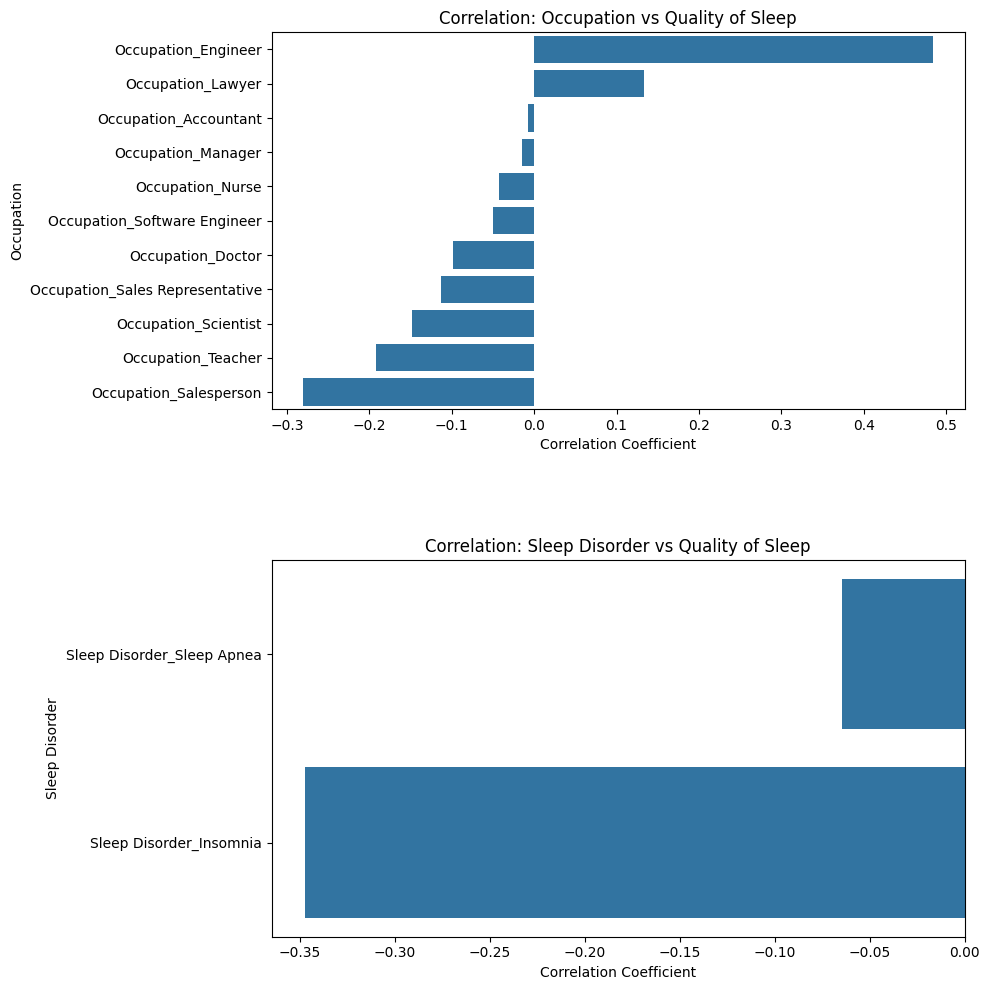

In [33]:


all_corr = df.corr()['Sleep Duration']

occ_corr = all_corr.filter(like='Occupation').sort_values(ascending=False)
sleep_dis_corr = all_corr.filter(like='Sleep Disorder').sort_values(ascending=False)


plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.barplot(x=occ_corr.values, y=occ_corr.index)
plt.title('Correlation: Occupation vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Occupation')

plt.subplot(2, 1, 2)
sns.barplot(x=sleep_dis_corr.values, y=sleep_dis_corr.index)
plt.title('Correlation: Sleep Disorder vs Quality of Sleep')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sleep Disorder')


plt.tight_layout()

plt.subplots_adjust(hspace=0.4)
plt.show()



In [20]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic', 'Diastolic', 'is_Male',
       'Sleep Target'],
      dtype='object')

I am also gonna do some *standard scaling*

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
cols_to_drop = ['Person ID', 'Sleep Duration', 'Quality of Sleep','Sleep Target',
                'Systolic']

X = df.drop(columns= cols_to_drop, axis = 1)
y = df['Sleep Target']


X_train, X_test,y_train, y_test = train_test_split(X, y, random_state= 8, train_size= 0.8)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


print(f"train shape: {X_train_scaled.shape}")
print(f"test shape: {X_test_scaled.shape}")


train shape: (299, 22)
test shape: (75, 22)


Since our data is quite small, we will be use `Random Forest` and base model of `Logistic Regression`

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


forest_model = RandomForestClassifier(random_state= 8, n_estimators= 100)
forest_model.fit(X_train_scaled, y_train)

base_model = LogisticRegression(multi_class="multinomial", random_state= 8, max_iter= 1000)
base_model.fit(X_train_scaled, y_train)


forest_y = forest_model.predict(X_test_scaled)
base_y = base_model.predict(X_test_scaled)


C:\Users\ducth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Forest Model
              precision    recall  f1-score   support

           1       0.88      1.00      0.94        23
           2       0.93      0.87      0.90        31
           3       0.95      0.90      0.93        21

    accuracy                           0.92        75
   macro avg       0.92      0.93      0.92        75
weighted avg       0.92      0.92      0.92        75


Base Model
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       0.76      0.71      0.73        31
           3       0.67      0.67      0.67        21

    accuracy                           0.79        75
   macro avg       0.78      0.79      0.79        75
weighted avg       0.78      0.79      0.78        75



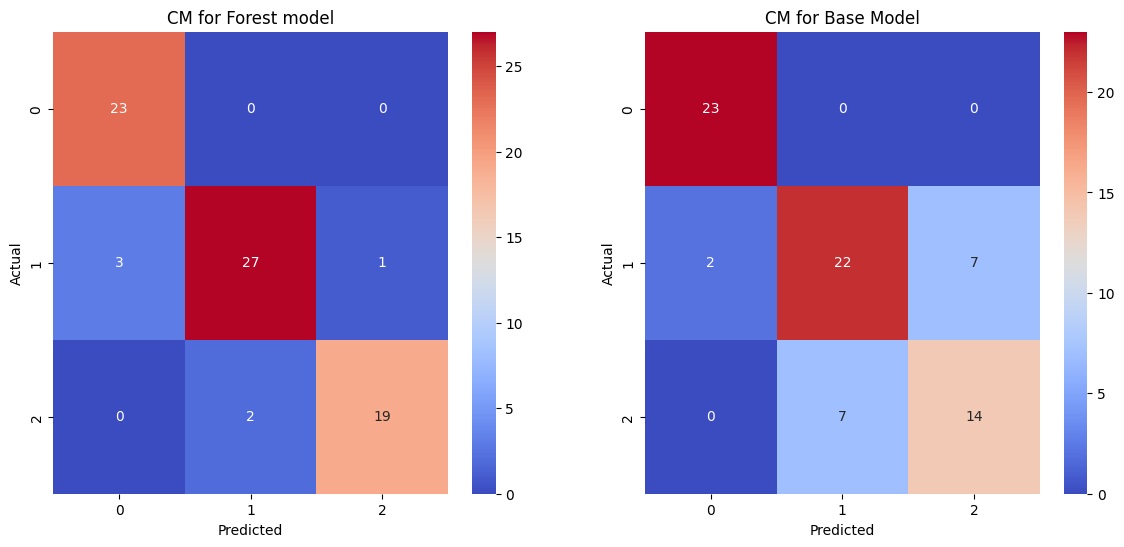

In [48]:
from sklearn.metrics import confusion_matrix, classification_report



print("Forest Model")
print(classification_report(y_test, forest_y))

print("\nBase Model")
print(classification_report(y_test, base_y))

cm_for = confusion_matrix(y_test, forest_y)
cm_base = confusion_matrix(y_test, base_y)


plt.figure(figsize = (14,6))

plt.subplot(1, 2, 1)

sns.heatmap(cm_for, cmap = 'coolwarm', annot = True, fmt = 'd')
plt.title("CM for Forest model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)

sns.heatmap(cm_base, cmap = 'coolwarm', annot = True, fmt = 'd')
plt.title("CM for Base Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


In [49]:
from sklearn.inspection import permutation_importance


X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_train.columns)

result = permutation_importance(forest_model, X_test_scaled_df, y_test, n_repeats = 10
                                , random_state= 8)

features_name = df.drop(columns= cols_to_drop, axis= 1).columns

perm_import = pd.Series(result.importances_mean, index =features_name).sort_values(ascending=True)




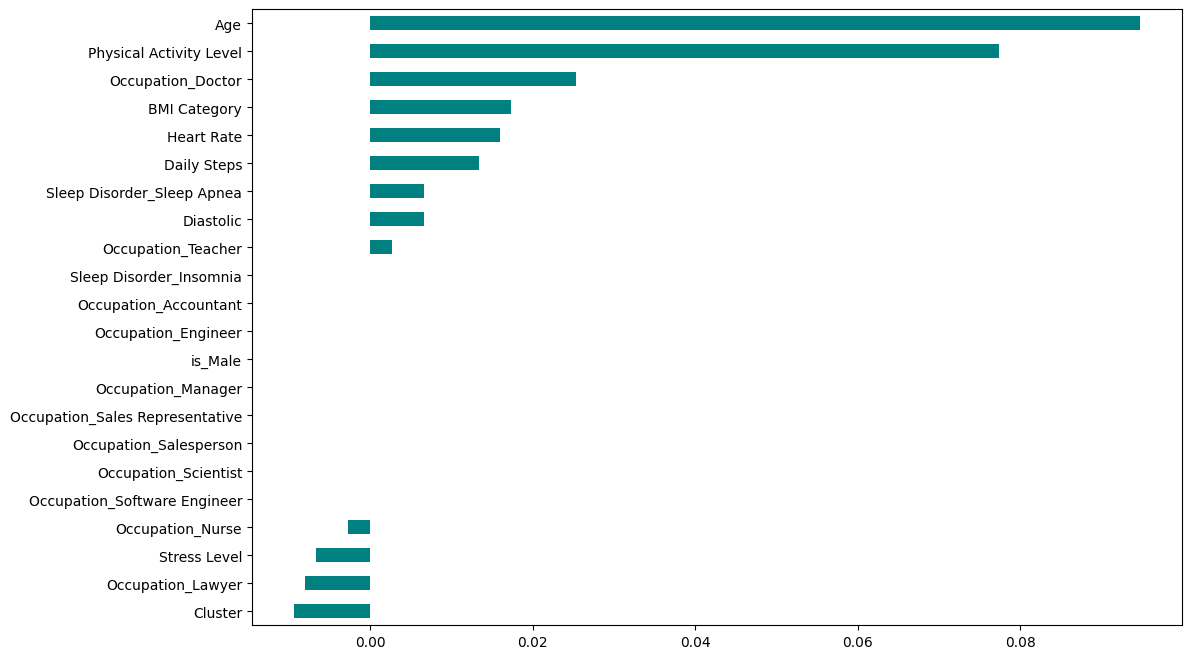

In [50]:
plt.figure(figsize= (12, 8))
perm_import.plot(kind='barh', color = 'teal')

plt.show()

In [69]:
features_to_cluster = [ 'Age', 'Physical Activity Level', 'Stress Level',
                       'Heart Rate', 'BMI Category']

X_cluster = scaler.fit_transform(df[features_to_cluster])


X_cluster.head(1)


,Age,Physical Activity Level,Stress Level,Heart Rate,BMI Category
0,-1.753096,-0.825418,0.347021,1.654719,1.004126


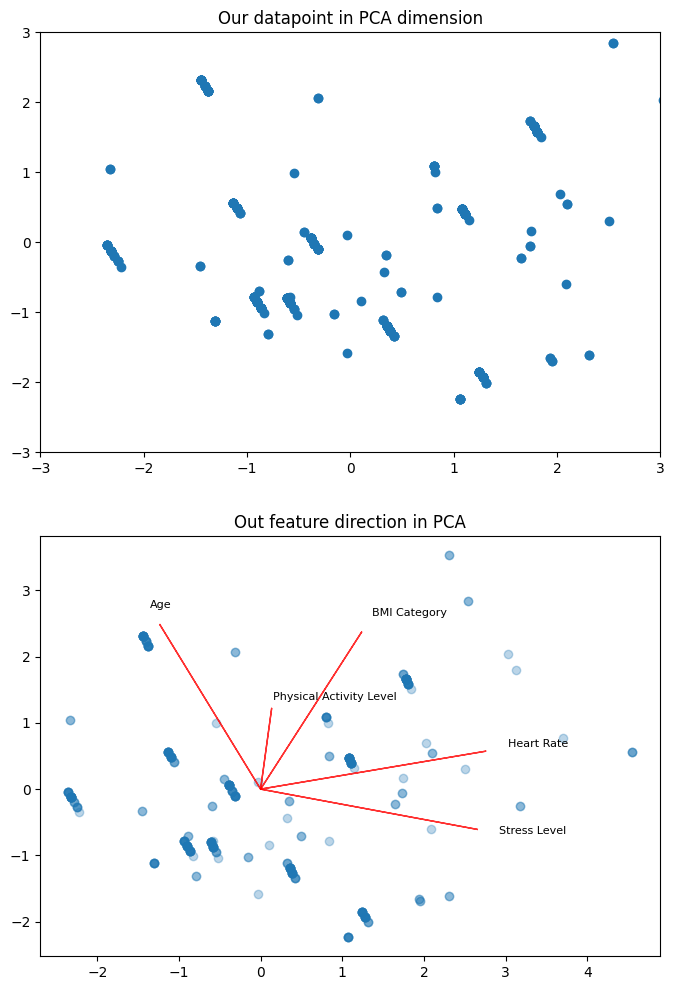

In [59]:
from sklearn.decomposition import PCA

scale_factor = 3

pca = PCA(n_components= 2)

pca_data = pca.fit_transform(X_cluster)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize= (8 , 12))
plt.subplot(2, 1, 1)

plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1])
plt.title("Our datapoint in PCA dimension")

plt.xlim(-scale_factor, scale_factor)
plt.ylim(-scale_factor, scale_factor)

plt.subplot(2, 1, 2)
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], alpha = 0.3)

for i, feature in enumerate(features_to_cluster):
    x_val = loadings[i, 0] * scale_factor
    y_val = loadings[i, 1] * scale_factor
    plt.arrow(0, 0, x_val, y_val,
              color = 'red', alpha = 0.8)
    
    plt.text(x_val * 1.1, y_val * 1.1, feature, color='black', fontsize=8)
    


plt.title("Out feature direction in PCA")
plt.show()

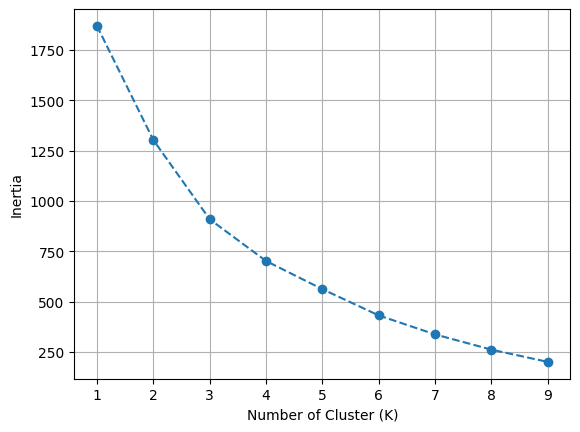

In [60]:
from sklearn.cluster import KMeans


inertia = []

K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters= k, random_state= 8, n_init= 10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker = 'o', linestyle = '--')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('Inertia')

plt.grid(True)

plt.show()


In [67]:
from sklearn.metrics import silhouette_score

best_k_cand = [2, 3, 4, 5, 6, 7, 8, 9, 10]


for k in best_k_cand:
    kmeans_final = KMeans(n_clusters= k, random_state= 8, n_init= 10)

    labels = kmeans_final.fit_predict(X_cluster)

    score = silhouette_score(X_cluster, labels)
    print(f"Silhouette Score for k = {k}: {score}")

Silhouette Score for k = 2: 0.34721962217681707
Silhouette Score for k = 3: 0.4196495735898834
Silhouette Score for k = 4: 0.47318585780070843
Silhouette Score for k = 5: 0.518777478289988
Silhouette Score for k = 6: 0.5788995544832648
Silhouette Score for k = 7: 0.6101840019499719
Silhouette Score for k = 8: 0.6623239522927029
Silhouette Score for k = 9: 0.6677664214463969
Silhouette Score for k = 10: 0.7324355356654257


In [68]:
# Create a quick comparison function
def profile_clusters(k_val, data, original_df):
    model = KMeans(n_clusters=k_val, random_state=8, n_init=10)
    labels = model.fit_predict(data)
    
    # Add labels to a copy of the original dataframe
    temp_df = original_df.copy()
    temp_df['Cluster'] = labels
    
    # Calculate the mean of the 5 features for each cluster
    profile = temp_df.groupby('Cluster')[features_to_cluster].mean()
    return profile

# Compare them


print("\n--- 5 Clusters Profile ---")
print(profile_clusters(5, X_cluster, df))

print("--- 6 Clusters Profile ---")
print(profile_clusters(6, X_cluster, df))


--- 5 Clusters Profile ---
               Age  Physical Activity Level  Stress Level  Heart Rate  \
Cluster                                                                 
0        44.443299                60.597938      7.092784   74.927835   
1        36.860140                70.489510      4.909091   68.944056   
2        48.932203                36.355932      3.525424   65.000000   
3        57.500000                75.833333      3.083333   68.055556   
4        31.743590                33.256410      7.820513   72.564103   

         BMI Category  
Cluster                
0            1.103093  
1            0.000000  
2            0.457627  
3            0.944444  
4            0.000000  
--- 6 Clusters Profile ---
               Age  Physical Activity Level  Stress Level  Heart Rate  \
Cluster                                                                 
0        36.902778                70.326389      4.923611   68.944444   
1        49.611111                88.333333   

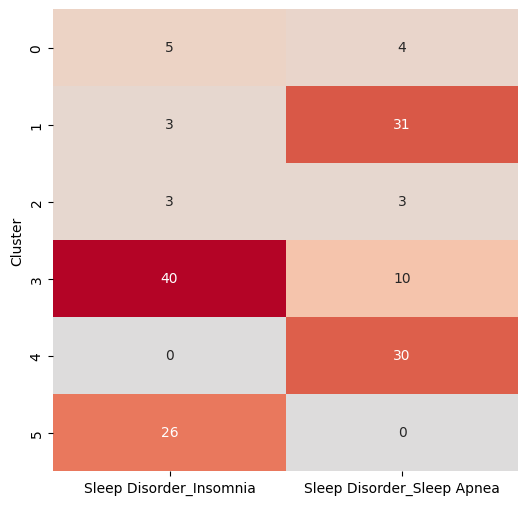

In [90]:
# 1. Fit final model and add labels to original df
kmeans_6 = KMeans(n_clusters=6, random_state=8, n_init=10)
df['Cluster'] = kmeans_6.fit_predict(X_cluster)


cluster_disorders = df.groupby('Cluster')[['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea']].sum()

plt.figure(figsize= (6, 6))

sns.heatmap(cluster_disorders, cmap = 'coolwarm',
            center = 0, annot = True, cbar =False)
plt.show()

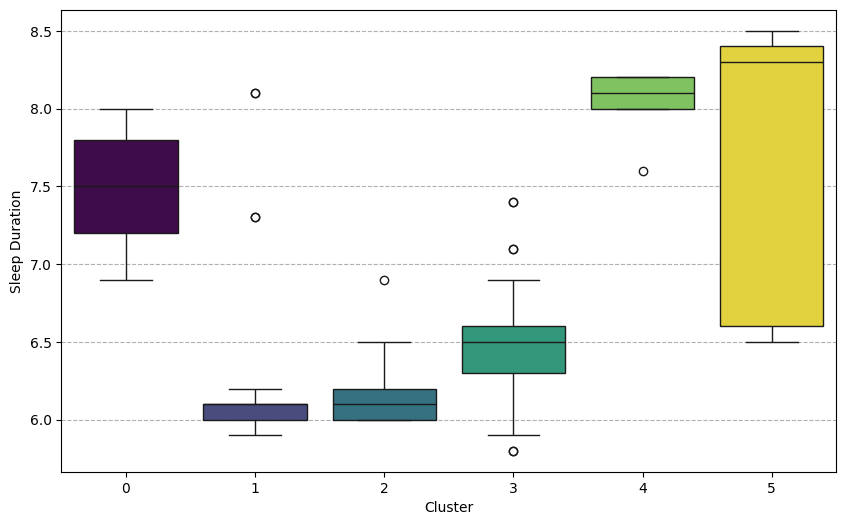

In [74]:
plt.figure(figsize= (10, 6))

sns.boxplot(df, x = 'Cluster', hue = 'Cluster', legend = False,
             y = 'Sleep Duration', palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Sleep Duration")

plt.grid(axis = 'y', linestyle = '--')
plt.show()

In [75]:
df.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Systolic', 'Diastolic', 'is_Male',
       'Sleep Target', 'Cluster'],
      dtype='object')

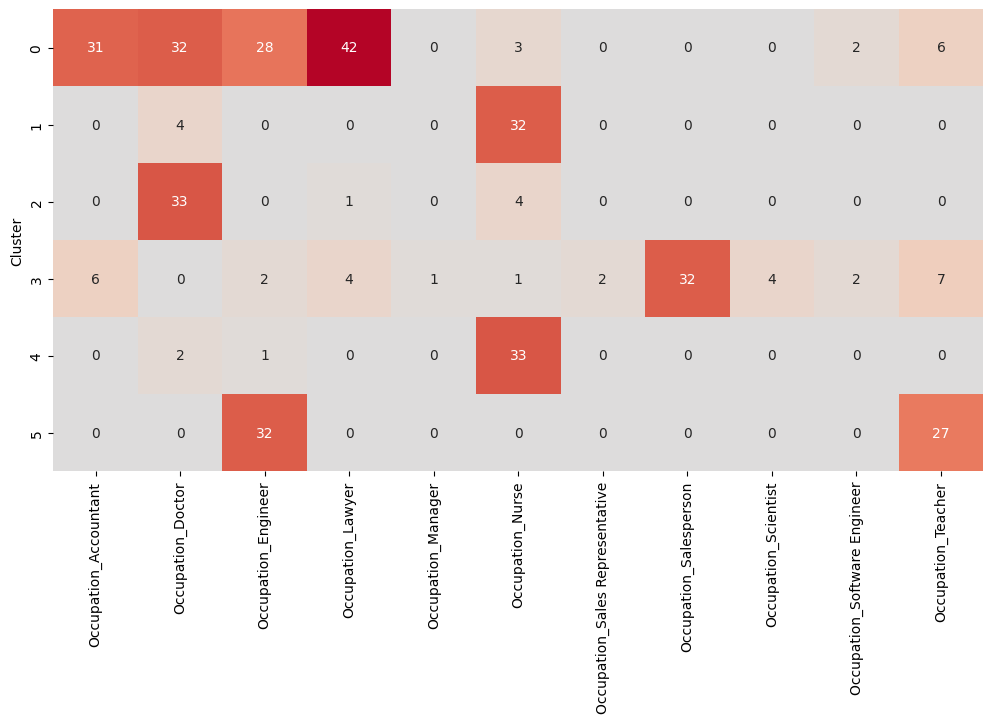

In [91]:

cluster_disorders = df.groupby('Cluster')[['Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher']].sum()

plt.figure(figsize= (12, 6))
sns.heatmap(cluster_disorders, cmap= 'coolwarm', 
            center = 0, annot = True, cbar = False)

plt.show()